**логистическая регрессия**  
метод градиентного спуска,  
линейный классификатор


Евгений Борисов borisov.e@solarl.ru

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing   import MinMaxScaler

---

In [2]:
# from time import time
# def get_seed(): t = time() ; return int(((t%1)/(t//1))*1e11)

In [3]:
# загружаем даные
data = [
    np.loadtxt('../data/200_2b/points_1.txt'),
    np.loadtxt('../data/200_2b/points_2.txt')
]

In [4]:
# собираем вместе
X = np.vstack(data)

In [5]:
# метки классов
y = [ [i]*data[i].shape[0] for i in range(len(data)) ]
y = np.asarray(sum(y,[]))
# y = y*2-1

In [6]:
X.shape, y.shape

((200, 2), (200,))

In [7]:
%xdel data

In [8]:
# нормируем данные
X = MinMaxScaler([-1.0,1.0]).fit_transform(X)

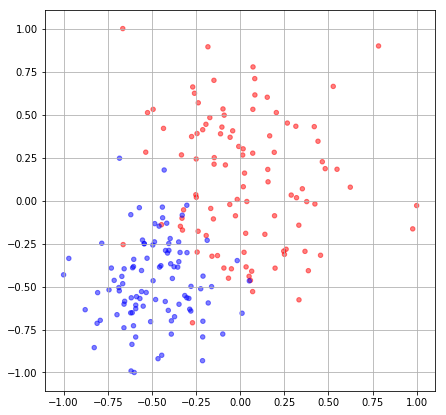

In [9]:
plt.figure(figsize=(7,7))
plt.scatter( x=X[:,0], 
             y=X[:,1], 
             c=[ 'b' if(j>0) else 'r' for j in y ], 
             s=20,
             alpha=0.5 )
plt.grid()
plt.show()

---

In [10]:
Xp = np.hstack([np.ones([X.shape[0],1]),X])
Xp.shape

(200, 3)

In [11]:
def act(z): return 1.0/(1.0 + np.exp(-z))

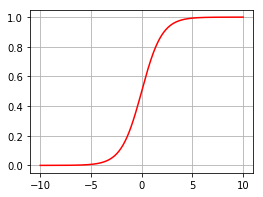

In [12]:
plt.figure(figsize=(4,3))
z=np.linspace(-10,10,500)
plt.plot( z,act(z),'-r' )
plt.grid()
plt.show()

In [13]:
# инициализация параметров
# np.random.seed(get_seed())
W = np.random.normal(loc=0.0, scale=0.1, size=Xp.shape[1])
W 

array([ 0.11178576,  0.0299492 , -0.01367685])

In [14]:
# ф-ция потери - кросс-энтропия
def loss(o,y):
    o_restr = np.minimum(0.99999,np.maximum(1e-9,o))
    return -( y*np.log(o_restr) + (1-y)*np.log(1.0-o_restr) ).sum() / y.shape[0]    

In [15]:
# def CrossEntropy(o, y): return -log(o) if (y == 1)  else -log(1.0 - o)

In [16]:
# метод градиентного спуска

a=0.1 # скорость обучения

MAX_ITER = 500 # максимальное число циклов обучения
MIN_ERROR = 0.17 # порог минимальной ошибки

er_hist = [] # история ошибки

In [17]:
for i in range(MAX_ITER):
    
    O = act(Xp.dot(W)) # выход
    E = O - y # ошибка
    
    er_hist.append( loss(O,y) ) # значение ф-ции потери     
    
    if er_hist[-1] < MIN_ERROR: # проверяем достижение порога
        print(i,'min error ',er_hist[-1])
        break

    dW = Xp.T.dot(E)
    
    W = W - a*dW
   

42 min error  0.1699609477033395


In [18]:
print(W)
print(len(er_hist),er_hist[-1])

[-3.88815285 -9.44200128 -6.63013101]
43 0.1699609477033395


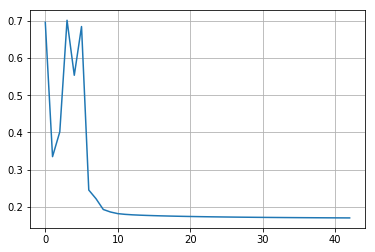

In [19]:
plt.plot(range(len(er_hist)),er_hist)
plt.grid()
plt.show()

---

In [20]:
score_bound=0.5
r = act(Xp.dot(W))

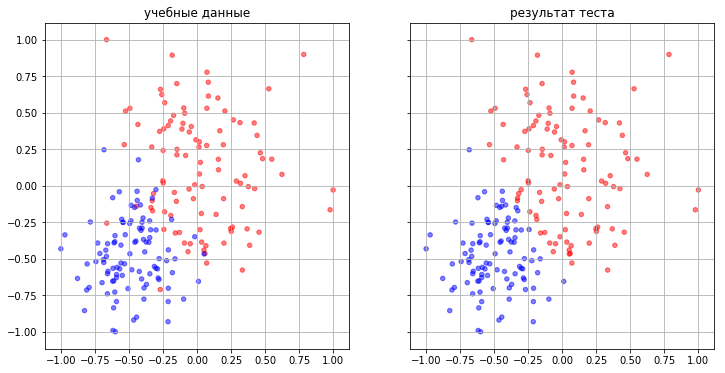

In [21]:
f, axarr = plt.subplots(1,2, sharex=True, sharey=True,figsize=(12,6),)
    
axarr[0].set_title('учебные данные')
axarr[0].scatter( x=X[:,0], 
             y=X[:,1], 
             c=[ 'b' if(j>0) else 'r' for j in y ], 
             s=20,
             alpha=0.5 )
axarr[0].grid()

axarr[1].set_title('результат теста')
axarr[1].scatter( x=X[:,0], 
             y=X[:,1], 
             c=[ 'b' if(j>score_bound) else 'r' for j in r ], 
             s=20,
             alpha=0.5 )
axarr[1].grid()

plt.show()